# Neural Network for Binary Classification

### Determines if patient had an onset of diabetes within five years
- Using Pima Indians dataset downloaded from [here](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv)
- All input variables that describe each patient are numerical and have been transformed

### Input Variables (X)
1. Number of times pregnant
2. Plasma glucose concentration at 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-hour serum insulin (μIU/ml)
6. Body mass index (weight in kg/(height in m)2)
7. Diabetes pedigree function
8. Age (years)

### Output Variables (Y):
- Class label (0 or 1)

In [44]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

In [45]:
# load the dataset, split into input (X) and output (y) variables
dataset = np.loadtxt('pima-indians-diabetes.csv', delimiter=',')
X = dataset[:,0:8]
Y = dataset[:,8]

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

In [47]:
X_test.shape

(154, 8)

In [48]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.float32).reshape(-1,1)
Y_test = torch.tensor(Y_test, dtype=torch.float32).reshape(-1,1)

In [49]:
X_test.shape

torch.Size([154, 8])

In [50]:
# model = nn.Sequential(
#     nn.Linear(8, 12),
#     nn.ReLU(),
#     nn.Linear(12,8),
#     nn.ReLU(),
#     nn.Linear(8,1),
#     nn.Sigmoid()
# )

In [51]:
# print(model)

In [52]:
class PimaClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(8,12)
        self.act1 = nn.ReLU()
        self.hidden2 = nn.Linear(12,8)
        self.act2 = nn.ReLU()
        self.output = nn.Linear(8,1)
        self.act_output = nn.Sigmoid()
        
    def forward(self, x):
        x = self.act1(self.hidden1(x))
        x = self.act2(self.hidden2(x))
        x = self.act_output(self.output(x))
        return x
    
model = PimaClassifier()
print(model)

PimaClassifier(
  (hidden1): Linear(in_features=8, out_features=12, bias=True)
  (act1): ReLU()
  (hidden2): Linear(in_features=12, out_features=8, bias=True)
  (act2): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
  (act_output): Sigmoid()
)


In [53]:
def train_model(lr, n_epochs, batch_size):
    model = PimaClassifier()
    loss_fn = nn.BCELoss() 
    optimizer = optim.Adam(model.parameters(), lr=lr)
    epoch_losses = [] 

    for epoch in range(n_epochs):
        batch_losses = [] 
        for i in range(0,len(X_train), batch_size):
            Xbatch = X_train[i:i+batch_size]
            y_pred = model(Xbatch)
            ybatch = Y_train[i:i+batch_size]
            loss = loss_fn(y_pred, ybatch)
            
            batch_losses.append(loss.item())
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        epoch_loss = sum(batch_losses) / len(batch_losses)  
        epoch_losses.append(epoch_loss)  
        
        if epoch%100 == 0 and epoch!=0:
            print(f'Finished epoch {epoch}, average loss {epoch_loss}')
    
    return model, epoch_losses

In [59]:
learning_rates = sorted([0.001, 0.0005, 0.0001, 0.005, 0.01, 0.1])
batch_size_param = 10
#batch_sizes = [10, 20, 30]
n_epochs = 1000

models = {}
losses_ls= {}

for i in learning_rates:
    model, losses = train_model(lr=i, n_epochs=1000, batch_size=batch_size_param)
    models[f"Learning rate{i}"] = model
    losses_ls[f"Learning rate{i}"] = losses

Finished epoch 100, average loss 0.5773902468142971
Finished epoch 200, average loss 0.5503413182112479
Finished epoch 300, average loss 0.5321661334845328
Finished epoch 400, average loss 0.5154714262293231
Finished epoch 500, average loss 0.5035388436048261
Finished epoch 600, average loss 0.49525281690782114
Finished epoch 700, average loss 0.4876708354680769
Finished epoch 800, average loss 0.48024306710689296
Finished epoch 900, average loss 0.4730601281889023
Finished epoch 100, average loss 0.5393807758246699
Finished epoch 200, average loss 0.506139645413045
Finished epoch 300, average loss 0.4777168028296963
Finished epoch 400, average loss 0.4411319823515031
Finished epoch 500, average loss 0.41228785125478623
Finished epoch 600, average loss 0.39380362197276086
Finished epoch 700, average loss 0.37422477670254245
Finished epoch 800, average loss 0.36670893574914626
Finished epoch 900, average loss 0.3589966763411799
Finished epoch 100, average loss 0.48808890484994455
Finish

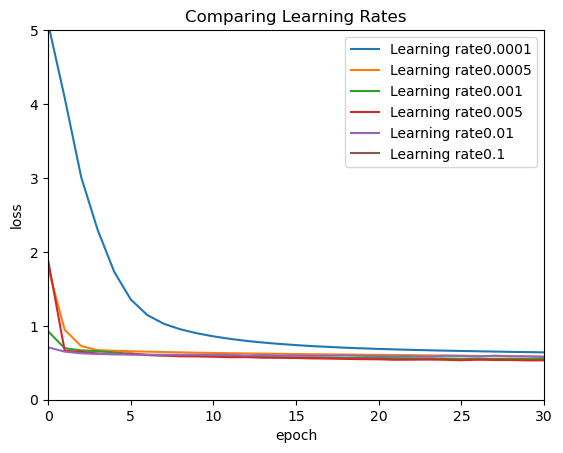

In [77]:
import matplotlib.pyplot as plt
for key in losses_ls:
    plt.plot(losses_ls[key], label=key)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.title("Comparing Learning Rates")
    plt.ylim(0,5)
    plt.xlim(0, 30)
    plt.legend()
    plt.show

In [76]:
# compute accuracy (no_grad is optional)
for key in models:
    model_ = models[key]
    y_pred = model_(X_test)    
    accuracy = (y_pred.round() == Y_test).float().mean()
    print(f"{key} ==> Accuracy {accuracy}")

    predictions = (model_(X_test) > 0.5).int()
    for i in range(5):
        print('%s => %d (expected %d)' % (X_test[i].tolist(), predictions[i], Y_test[i]))

Learning rate0.0001 ==> Accuracy 0.7207792401313782
[6.0, 98.0, 58.0, 33.0, 190.0, 34.0, 0.4300000071525574, 43.0] => 1 (expected 0)
[2.0, 112.0, 75.0, 32.0, 0.0, 35.70000076293945, 0.14800000190734863, 21.0] => 0 (expected 0)
[2.0, 108.0, 64.0, 0.0, 0.0, 30.799999237060547, 0.15800000727176666, 21.0] => 0 (expected 0)
[8.0, 107.0, 80.0, 0.0, 0.0, 24.600000381469727, 0.8560000061988831, 34.0] => 0 (expected 0)
[7.0, 136.0, 90.0, 0.0, 0.0, 29.899999618530273, 0.20999999344348907, 50.0] => 0 (expected 0)
Learning rate0.0005 ==> Accuracy 0.7597402334213257
[6.0, 98.0, 58.0, 33.0, 190.0, 34.0, 0.4300000071525574, 43.0] => 1 (expected 0)
[2.0, 112.0, 75.0, 32.0, 0.0, 35.70000076293945, 0.14800000190734863, 21.0] => 0 (expected 0)
[2.0, 108.0, 64.0, 0.0, 0.0, 30.799999237060547, 0.15800000727176666, 21.0] => 0 (expected 0)
[8.0, 107.0, 80.0, 0.0, 0.0, 24.600000381469727, 0.8560000061988831, 34.0] => 0 (expected 0)
[7.0, 136.0, 90.0, 0.0, 0.0, 29.899999618530273, 0.20999999344348907, 50.0] =>